## **K-means Clustering From Scratch**


<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Algorithm Steps](#1)
1.  [Term Description](#2)
1.  [Import libraries](#3)
1.	[K-means methods](#4)
1.	[Applying k-means model](#5)

    5.1.	[Dataset1](#5.1)
    
    5.2.	[Dataset2](#5.2)
    
    5.3.	[Dataset3](#5.3)
    
    5.4.	[Dataset4](#5.4)

#### 1. Algorithm Steps:<a class="anchor" id="1"></a>
[Table of Contents](#0.1)

    Step 1: Select the Number of Clusters, k
    Step 2: Select k Points at Random
    Step 3: Make k Clusters -> Assign every item to its nearest cluster centroid
    Step 4: Compute New Centroid of Each Cluster -> Recompute the centroids of the    clusters based on the new cluster assignments, where a centroid is the mean point
    
    Step 5: Repeat Steps 3–4


### 2. Terms Description <a class="anchor" id="2"></a>
    1. points : Set of unlabelled items , or training instances that will be used to apply clustering models. 
    2.   k    : User-specified target number of clusters
    3. centroids : set of all mean vector of all items assigned to a given cluster
    4. labels : Labels of each point . which specified each point belongs to a specific cluster

#### 3. Import libraries <a class="anchor" id="3"></a>



In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # import Pyplot package to visualize data 
import random # Generating pseudo-random numbers
import numpy as np # linear algebra

from sklearn import datasets # To generate data
from scipy.spatial.distance import cdist # To compute distances
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.cluster import rand_score
from time import sleep as sleep # import sleep to show output for some time period
from IPython.display import clear_output # used to clear screen

### 4. K-means methods<a class="anchor" id="4"></a>

[Table of Contents](#0.1)


#### 4.1 select k of points randomly acts as centroids

In [2]:
# initialize_centroids function takes a dataset and number of clusters as input 
# return array contians k of centroids
def initialize_centroids(points, k):
    centroids = []

    for i in range(k):
        
        L = len(points)-1  # Define length of dataset  
        n = np.random.randint(0,L)  # choosing randomly an index
        centroid = points[n] # get a row from the dataset randomly
        centroids.append(centroid) # append a chosen centroid to an array 
    n = np.array(centroids) # convert list to ndarray 

    return n

#### 4.2 Assign all data points to the closest centroid bassed on euclidean ditances

In [3]:
# create_cluster takes dataset and k centroids as inputs 
# Calculating the distance from each data point to each of the k centroids 
# then assign the data point to the closest centroid
# return the labels array 

def create_cluster(points,centroids):
    #finding the distance between centroids and all the data points
    distances = cdist(points, centroids ,'euclidean') 
    
    #Centroid with the minimum Distance
    #np.argmin : Returns the indices of the minimum values along an axis.
    clusters = np.array([np.argmin(i) for i in distances]) 

    return clusters 

#### 4.3 Update the new centroids as the mean of all points in the cluster

In [4]:
# update_centroids takes a dataset and lebels and number of clusters as inputs 
# it calculate the coordinates of the centroid 
# by comouting the mean of all data points in the cluster 
# returns updted centroids and lebels of points

def update_centroids(points,labels,k):
    centroids = []
    for idx in range(k):

        temp_cent = points[labels==idx].mean(axis=0) 
        centroids.append(temp_cent)
        
    # vstack returns:  ndarray
    centroids = np.vstack(centroids) #Updated Centroids 
    #centroids = np.array(centroids)  # equivalent to prevois line
    
    # Ressign every item to its nearest cluster centroid
    labels = create_cluster(points,centroids)
    return centroids , labels

#### 4.4 Ploting


In [5]:
#  Animation of the K-Means algorithm
def plot_clusters(points, centroids, labels,iteration):
    
    sleep(0.15) # sleep for 0.15 seconds before showing the clusters plot 
    clear_output(wait=True) #  clear the screen in windows before showing the clusters plot

    plt.title(f'Iteration {iteration}') # show the no# of Iteration as a title 
    
    plt.scatter(x=points[:,0], y=points[:,1], c=labels ,cmap='Set3', s=15)
    plt.scatter(centroids[:,0],centroids[:,1],
                color = "DimGray" ,
                marker = "X",s=40, label = "centroid")

    plt.legend()
    plt.show()

In [6]:
# k_means function takes dataset and number of clusters "centroid_count" "K" ,
#and maxiumim numbers of itretions to imlement the kmeans alg. 
# return the last centroids and labels "points"
def k_means(points,k, max_iterations):
    
    # frist step --> 
    #calling the initialize_centroids method to initialize centroids randomly
    centroids = initialize_centroids(points,k) 
    
    # empty list to hold old centroids
    old_centroids = []
    # scatter the data before applying K Means algorithm 
    plt.scatter(points[:,0],points[:,1] ,color = 'DarkRed', cmap='Set3',s=15)
    plt.show()
    
    iteration = 1

    while iteration < max_iterations and not (np.array_equal(old_centroids, centroids)):
        old_centroids = centroids        
        clusters = create_cluster(points,centroids)
        centroids , labels = update_centroids(points, clusters,k)
        plot_clusters(points, centroids,labels, iteration)
        iteration += 1
    return centroids , labels

In [7]:
# compare method : takes data and true labels and predicted labels then visualize them
def compare( X, y , labels_  ):

    fig, axes = plt.subplots(1, 2, figsize=(8,4))
    axes[0].scatter(X[:,0],X[:,1], c=y,     cmap='Set3', edgecolor='k', s=15)
    axes[1].scatter(X[:,0],X[:,1], c=labels_ ,cmap='Set3', edgecolor='k', s=15)
    
    axes[0].tick_params(length=10, width=2, colors='k', labelsize=9)
    axes[1].tick_params(length=10, width=2, colors='k', labelsize=9)
    
    axes[0].set_title('Actual', fontsize=12)
    axes[1].set_title('Predicted', fontsize=12)

### 5. Applying k-means model<a class="anchor" id="5"></a>

[Table of Contents](#0.1) 

In [8]:
# initializing the number of points in each dataset
n_samples = 300  

#  initializing the number of the random number generator
random_state = 389

#### 5.1 Dataset_1<a class="anchor" id="5.1"></a>

[Table of Contents](#0.1)

In [9]:
# Generate dataset1 for clustering in the shape of a blobs.
X_dataset1,y_dataset1 = datasets.make_blobs(n_samples=n_samples,random_state=random_state)

In [10]:
max_iterations =30
centroid_count_ = 3

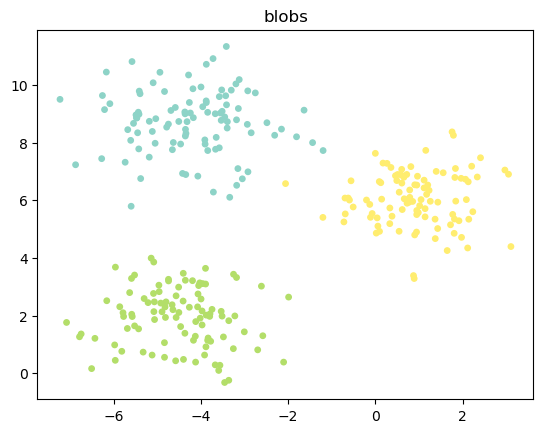

In [11]:
# plot the blob dataset with true lables
plt.scatter(X_dataset1[:,0],X_dataset1[:,1],c=y_dataset1,cmap='Set3',s=15)
plt.title("blobs")
plt.show()

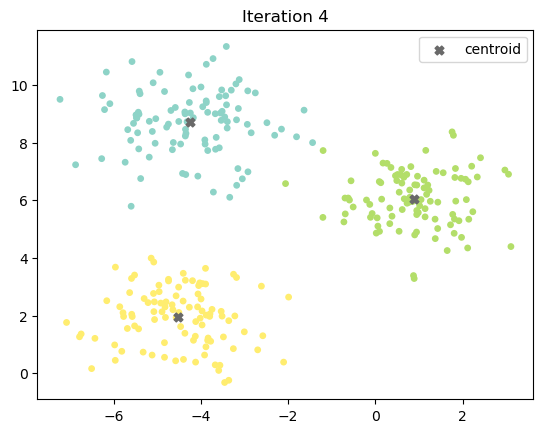

In [12]:
# Applay the K-means algorthim by calling k_means method
centroids_ ,labels_ =  k_means(X_dataset1,centroid_count_,max_iterations)

# Validation 

**Show the accuracy of each model using the following index:**
* a. F-measures
* b. Normalized mutual information.
* c. Rand Statistic


**>  **F1 Score****

In [13]:
#Use F-measures to compare result with true partition. 
d1_f1=f1_score(y_dataset1,labels_,average='macro')
d1_f1

0.3316582914572864

**>  **Normalized Mutual Information (NMI)****

In [14]:
#Use NMI to compare result with true partition. 
d1n=normalized_mutual_info_score(y_dataset1,labels_)
d1n

0.9829929733076641

**>  **Rand Statistic****

In [15]:
#Use Rand Statistic to compare result with true partition. 
d1r=rand_score(y_dataset1,labels_)
d1r

0.9955629877369008

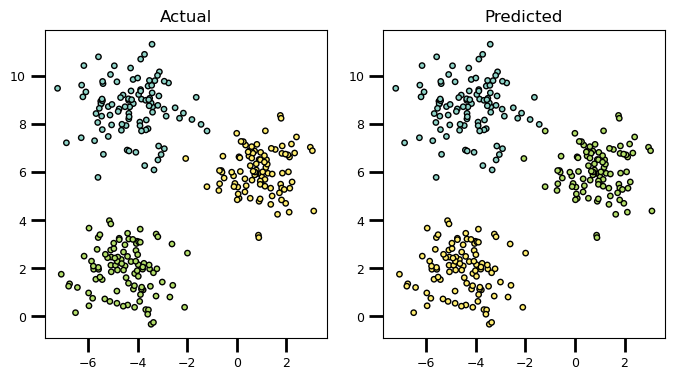

In [16]:
X = X_dataset1
y = y_dataset1
compare( X , y , labels_)

#### 5.2 Dataset_2<a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)

In [17]:
# Generate Dataset2 for clustering  : Anisotropicly distributed dataset.
X_dataset2,y_dataset2= datasets.make_blobs(n_samples=n_samples,random_state=random_state)

transformation = [[0.6, -0.6], [-0.4, 0.8]]

X_dataset2 = np.dot(X_dataset2, transformation)

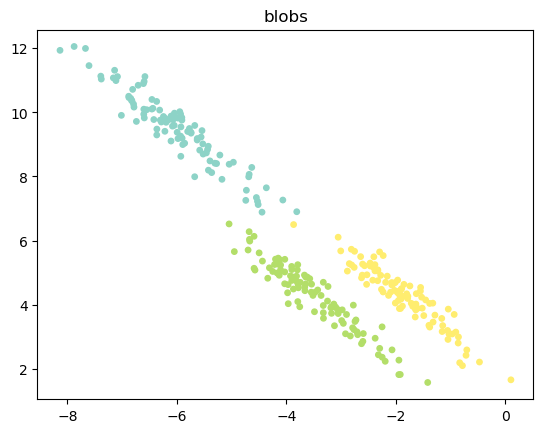

In [18]:
# plot the blob dataset with true lables
plt.scatter(X_dataset2[:,0],X_dataset2[:,1],c=y_dataset2,cmap='Set3',s=15)
plt.title("blobs")
plt.show()

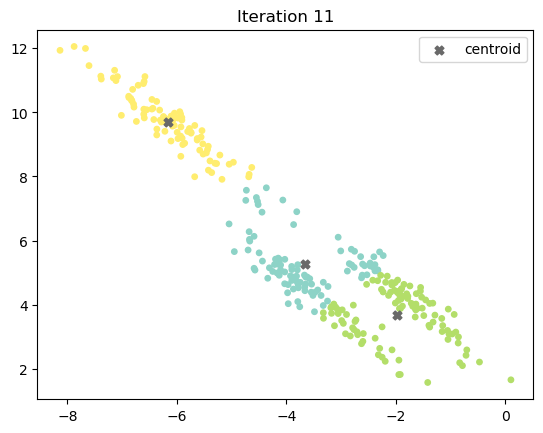

In [19]:
centroids_ ,labels_  = k_means(X_dataset2,centroid_count_,max_iterations)

# Validation 

**Show the accuracy of each model using the following index:**
* a. F-measures
* b. Normalized mutual information.
* c. Rand Statistic


**>  **F1 Score****

In [20]:
#Use F-measures to compare result with true partition. 
d2_f1=f1_score(y_dataset2,labels_,average='macro')
d2_f1

0.14995370813779013

**>  **Normalized Mutual Information (NMI)****

In [21]:
#Use NMI to compare result with true partition. 
d2n=normalized_mutual_info_score(y_dataset2,labels_)
d2n

0.5302698665883399

**>  **Rand Score****

In [22]:
#Use Rand Statistic to compare result with true partition. 
d2r=rand_score(y_dataset2,labels_)
d2r

0.7700111482720179

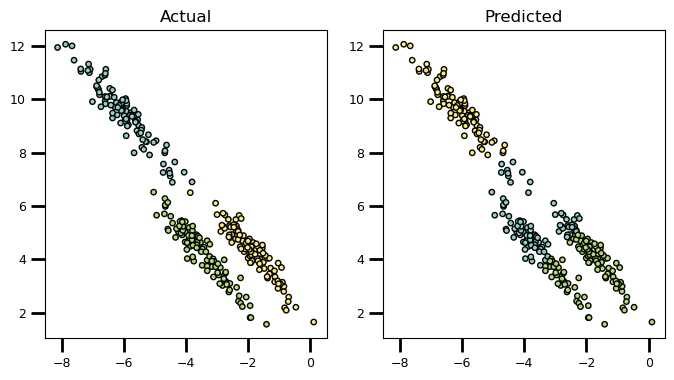

In [23]:
X = X_dataset2
y = y_dataset2
compare( X , y , labels_)

As we can see, For the dataset2 the  Dbscan Algorithm is the better than K-mean

#### 5.3 Dataset_3<a class="anchor" id="5.3"></a>

[Table of Contents](#0.1)

In [24]:
# Generate dataset3: Noisy moons dataset
X_dataset3,y_dataset3 = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

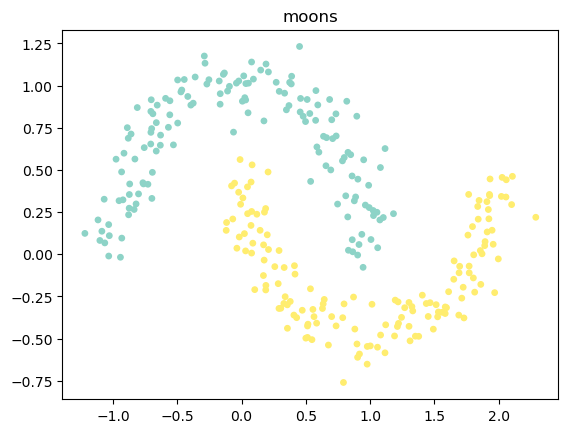

In [25]:
# plot the moon dataset with true lables
plt.scatter(X_dataset3[:,0],X_dataset3[:,1],c=y_dataset3 ,cmap='Set3',s=15)
plt.title("moons")
plt.show()

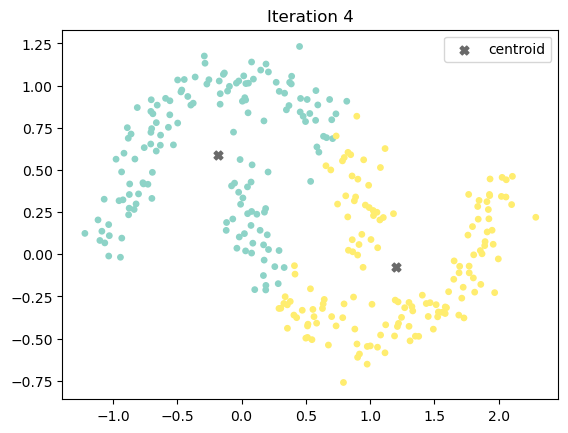

In [26]:
centroid_count = 2
centroids_ ,labels_  = k_means(X_dataset3,centroid_count,max_iterations)

# Validation 

**>  **F1 Score****

In [27]:
#Use F-measures to compare result with true partition. 
d3_f1=f1_score(y_dataset3,labels_,average='macro')
d3_f1

0.753322369883106

**>  **Normalized Mutual Information (NMI)****

In [28]:
#Use NMI to compare result with true partition. 
d3n=normalized_mutual_info_score(y_dataset3,labels_)
d3n

0.19410470729151905

**>  **Rand Score****

In [29]:
#Use Rand Statistic to compare result with true partition. 
d3r=rand_score(y_dataset3,labels_)
d3r

0.6271125975473801

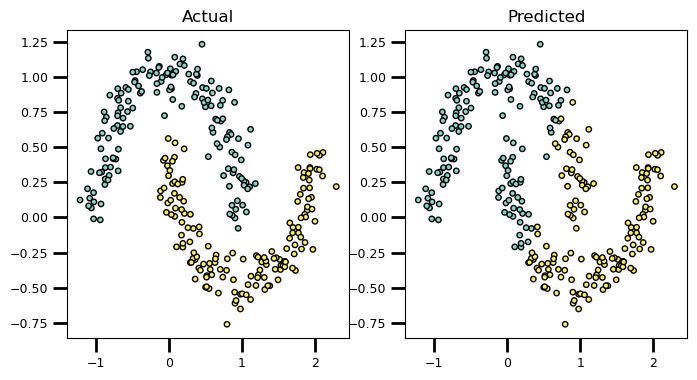

In [30]:
X = X_dataset3
y = y_dataset3
compare( X , y , labels_)

#### 5.4 Dataset_4<a class="anchor" id="5.4"></a>

[Table of Contents](#0.1)

In [31]:
# Genrates dataset4: noisy circles dataset
X_dataset4,y_dataset4 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05,random_state=random_state)

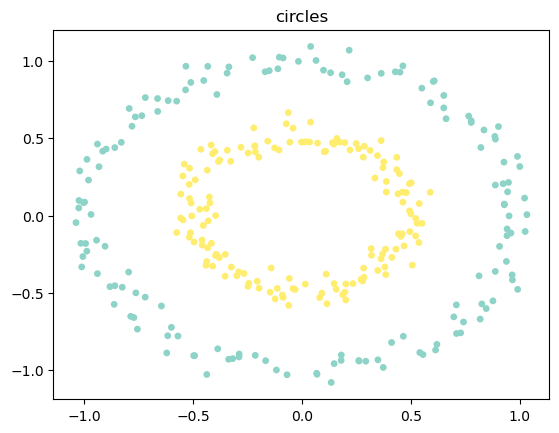

In [32]:
# plot the noisy circles dataset with true lables
plt.scatter(X_dataset4[:,0],X_dataset4[:,1],c=y_dataset4 ,cmap='Set3',s=15)
plt.title("circles")
plt.show()

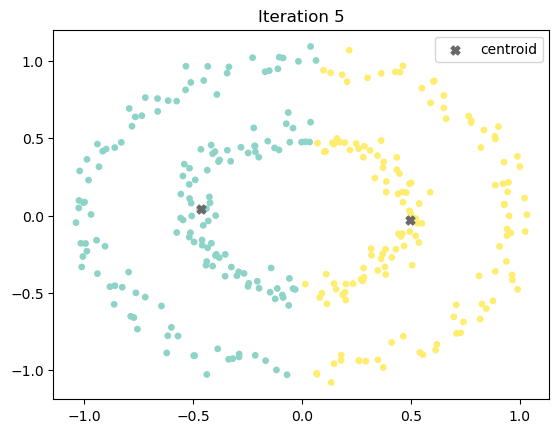

In [33]:
centroids_ ,labels_  = k_means(X_dataset4,centroid_count,max_iterations)

# Validation 

**>  **F1 Score****

In [34]:
#Use F-measures to compare result with true partition. 
d4_f1=f1_score(y_dataset4,labels_,average='macro')
d4_f1

0.48985829397054736

**>  **Normalized Mutual Information (NMI)****

In [35]:
#Use NMI to compare result with true partition. 
d4n=normalized_mutual_info_score(y_dataset4,labels_)
d4n

0.00028899516722555123

**>  **Rand Score****

In [36]:
#Use Rand Statistic to compare result with true partition. 
d4r=rand_score(y_dataset4,labels_)
d4r

0.4985284280936455

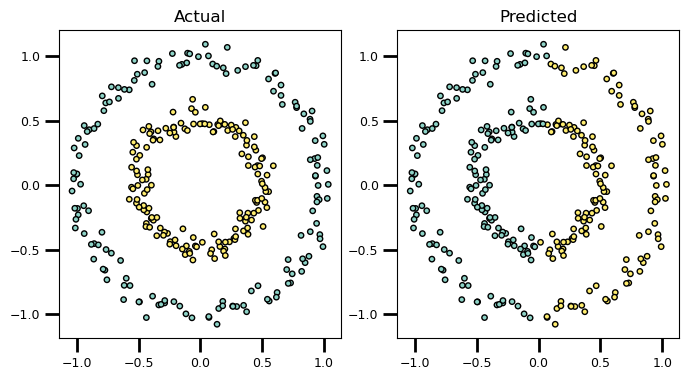

In [37]:
X = X_dataset4
y = y_dataset4
compare( X , y , labels_)